Thanks for Vladislav and his kernel https://www.kaggle.com/speedwagon/are-magics-interconnected  
Just wanna dive deeper into this interconnection thing.

## 1. Interconnection between magics

In [8]:
import numpy as np, pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from tqdm import tqdm_notebook

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")

train_data = pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')

In [2]:
train_data.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,...,beady-mauve-frog-distraction,surly-brass-maltese-ordinal,beady-asparagus-opossum-expert,beady-rust-impala-dummy,droopy-amethyst-dachshund-hint,homey-crimson-budgerigar-grandmaster,droopy-cardinal-impala-important,woozy-apricot-moose-hint,paltry-sapphire-labradoodle-dummy,crappy-carmine-eagle-entropy,greasy-magnolia-spider-grandmaster,crabby-carmine-flounder-sorted,skimpy-copper-fowl-grandmaster,hasty-seashell-woodpecker-hint,snappy-purple-bobcat-important,thirsty-carmine-corgi-ordinal,homely-auburn-reindeer-unsorted,crappy-beige-tiger-fepid,cranky-auburn-swan-novice,chewy-bistre-buzzard-expert,skinny-cyan-macaque-pembus,slimy-periwinkle-otter-expert,snazzy-burgundy-clam-novice,cozy-ochre-gorilla-gaussian,homey-sangria-wolfhound-dummy,snazzy-asparagus-hippopotamus-contributor,paltry-red-hamster-sorted,zippy-dandelion-insect-golden,baggy-coral-bandicoot-unsorted,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,-0.227027,0.575964,1.541908,1.745286,-0.624271,3.600958,1.176489,-0.182776,-0.228391,1.682263,-0.833236,-4.377688,-5.372410,-0.477742,-0.179005,-0.516475,0.127391,-0.857591,-0.461500,2.160303,-2.118371,0.515493,-1.201493,-0.027377,-1.154024,0.753204,-0.179651,-0.807341,-1.663626,0.893806,...,-1.829848,2.347131,0.082462,-1.012654,0.593752,2.904654,-0.428974,-0.919979,2.849575,-0.906744,0.729459,0.386140,0.319814,-0.407682,-0.170667,-1.242919,-1.719046,-0.132395,-0.368991,-5.112553,-2.085988,-0.897257,1.080671,-0.273262,0.342824,0.640177,-0.415298,-0.483126,-0.080799,2.416224,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,0.783980,-1.280579,-1.003480,-7.753201,-1.320547,0.919078,-1.036068,0.030213,0.910172,-0.905345,0.646641,-0.465291,-0.531735,-0.756781,0.193724,0.224277,-0.474412,1.885805,0.205439,-6.481422,1.035620,-0.453623,0.375936,-0.320670,-0.144646,-0.220129,0.577826,-0.360512,-0.600107,0.008111,...,0.982205,-1.161978,0.532269,1.133215,0.003503,-1.390962,0.158572,0.143794,-0.317185,1.017192,-0.395342,-0.642357,-0.627209,0.257271,-1.461564,0.325613,1.628369,0.640040,0.750735,1.164573,0.900373,0.063489,0.948158,0.273014,-1.269147,-0.251101,-2.271731,-0.044167,-0.443766,-1.144794,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.28855

In [4]:
cols = [c for c in train_data.columns if c not in ['id', 'target', 'wheezy-copper-turtle-magic']]

magic_idx = []
magic_pred = []
magic_auc = []

for i in tqdm_notebook(range(512)):
    train2 = train_data[train_data['wheezy-copper-turtle-magic'] == i]
    train2.reset_index(drop=True, inplace=True)

    clf = LogisticRegression(solver='liblinear', penalty='l1', C=0.05)
    clf.fit(train2[cols], train2['target'])

    for j in range(0, 512):
        val = train_data[train_data['wheezy-copper-turtle-magic'] == j]
        preds = clf.predict_proba(val[cols])[:, 1]
        auc = roc_auc_score(val['target'], preds)
        magic_idx.append(i)
        magic_pred.append(j)
        magic_auc.append(auc)

In [5]:
magic_mx = pd.DataFrame({'magic_fit':magic_idx, 'magic_pred':magic_pred, 'auc':magic_auc})
magic_mx = magic_mx[['magic_fit', 'magic_pred', 'auc']]
magic_mx.head()

,magic_fit,magic_pred,auc
0,0,0,0.879534
1,0,1,0.569999
2,0,2,0.499918
3,0,3,0.623787
4,0,4,0.384599


This illustrates the auc when we train the model on magic_fit and predict magic_pred.  
We can plot that as heatmap shown as following:

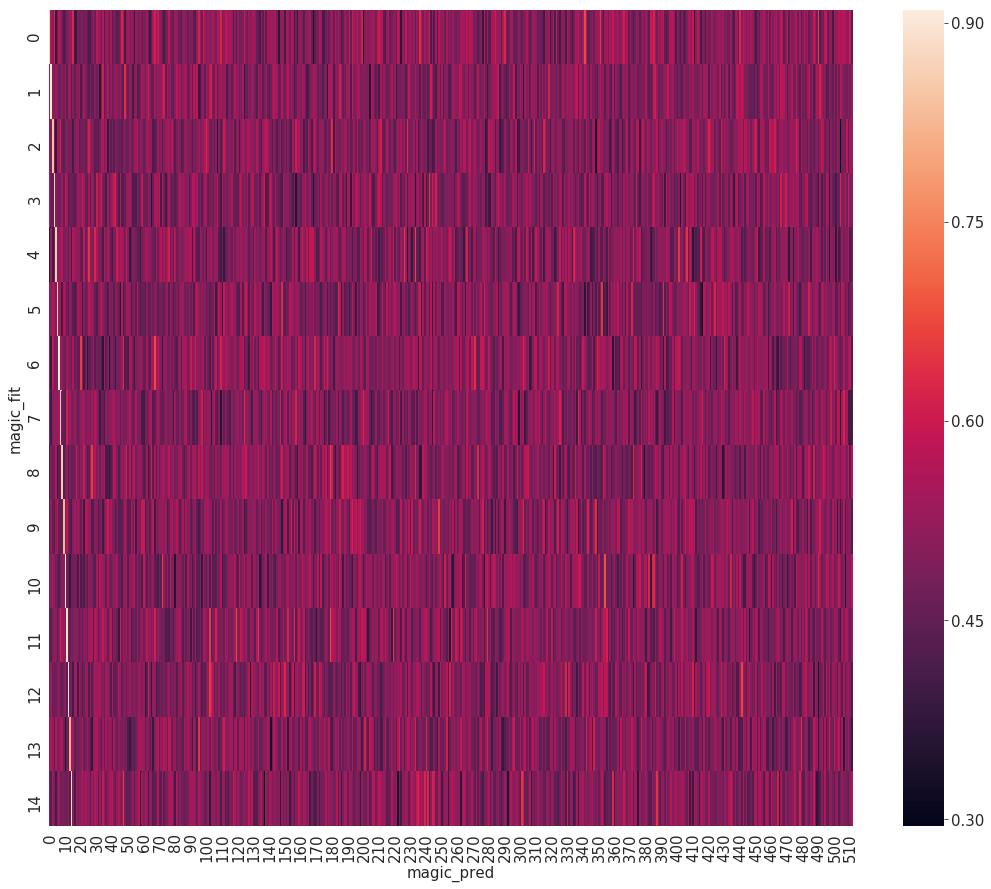

In [9]:
magic_mx_pt = pd.pivot_table(magic_mx, index='magic_fit', columns='magic_pred', values='auc')

plt.style.use({'figure.figsize':(18, 15), 'font.size':15}) # set the size of plots
sns.heatmap(magic_mx_pt)

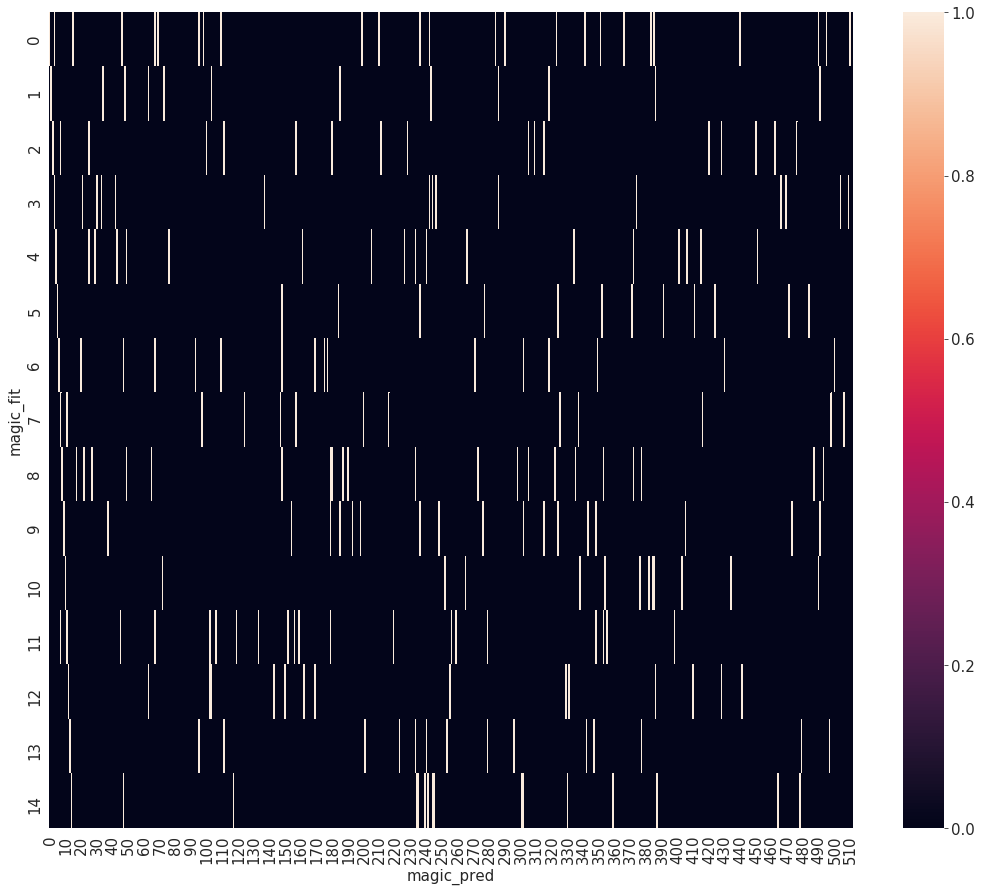

In [10]:
sns.heatmap(magic_mx_pt > 0.6) # higher correlated

## 2. Feature and Target correlation under different magics

In senkin13's EDA https://www.kaggle.com/senkin13/eda-starter (Thanks to him), we saw that the correlation between the features and target were very low. But how will it be under different magics? Let's see.

### Highly correlated

In [11]:
cols = [c for c in train_data.columns if c not in ['id', 'wheezy-copper-turtle-magic']]

magic_num = []
col_name = []
corr_ls = []
for i in tqdm_notebook(range(512)):
    tmp = train_data[train_data['wheezy-copper-turtle-magic'] == i]
    correlations = tmp[cols].corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
    correlations = correlations[correlations['level_0'] != correlations['level_1']]
    corr = correlations[correlations['level_0'] == 'target']
    magic_num.append(i)
    col_name.append(corr['level_1'].iloc[0])
    corr_ls.append(corr[0].iloc[0])

I just put the most highly correlated feature in the table here. (either positive or negative correlated)

In [12]:
corr_under_magic = pd.DataFrame({'magic':magic_num, 'feature':col_name, 'corr':corr_ls})
corr_under_magic.head()

,magic,feature,corr
0,0,cozy-vermilion-uguisu-grandmaster,0.241163
1,1,squirrely-harlequin-sheep-sumble,0.360360
2,2,paltry-sapphire-labradoodle-dummy,0.272128
3,3,hasty-puce-fowl-fepid,0.196456
4,4,skinny-ultramarine-cat-fimbus,0.265859


In [14]:
corr_under_magic['feature'].nunique()

222

In [17]:
corr_under_magic['feature'].value_counts()

beady-lilac-hornet-expert              8
geeky-amethyst-quetzal-unsorted        6
boozy-amethyst-tarsier-dataset         6
shabby-magenta-whippet-novice          5
leaky-grey-gerbil-sorted               5
greasy-crimson-squid-grandmaster       5
hilly-lime-vole-novice                 5
blurry-sangria-saola-gaussian          5
goopy-copper-fousek-distraction        5
silly-tan-tapir-pembus                 5
cranky-eggplant-oyster-sumble          5
shaggy-sapphire-eel-unsorted           5
flimsy-magnolia-gopher-learn           5
beady-asparagus-opossum-expert         4
snippy-burgundy-leopard-expert         4
crappy-cream-shrew-unsorted            4
crabby-carmine-flounder-sorted         4
baggy-mustard-collie-hint              4
hasty-puce-fowl-fepid                  4
ugly-tangerine-chihuahua-important     4
hazy-tan-schnauzer-hint                4
breezy-myrtle-loon-discard             4
lovely-plum-goat-novice                4
droopy-amethyst-dachshund-hint         4
wheezy-red-iguan

Well, looks like there might be something with "beady-lilac-hornet-expert"?

### Uncorrelated ones

In [20]:
cols = [c for c in train_data.columns if c not in ['id', 'wheezy-copper-turtle-magic']]

magic_num = []
col_name = []
corr_ls = []
for i in tqdm_notebook(range(512)):
    tmp = train_data[train_data['wheezy-copper-turtle-magic'] == i]
    correlations = tmp[cols].corr().abs().unstack().sort_values(kind="quicksort", ascending=True).reset_index()
    correlations = correlations[correlations['level_0'] != correlations['level_1']]
    corr = correlations[correlations['level_0'] == 'target']
    magic_num.append(i)
    col_name.append(corr['level_1'].iloc[0])
    corr_ls.append(corr[0].iloc[0])

In [21]:
corr_under_magic = pd.DataFrame({'magic':magic_num, 'feature':col_name, 'corr':corr_ls})
corr_under_magic.head()

,magic,feature,corr
0,0,hilly-lime-vole-novice,0.000088
1,1,boozy-amethyst-tarsier-dataset,0.000423
2,2,gloppy-mauve-bonobo-important,0.000294
3,3,wheezy-myrtle-mandrill-entropy,0.000033
4,4,snazzy-burgundy-clam-novice,0.000731


In [22]:
corr_under_magic['feature'].nunique()

222

In [23]:
corr_under_magic['feature'].value_counts()

squirrely-apricot-goat-hint          6
leaky-grey-gerbil-sorted             5
snazzy-burgundy-clam-novice          5
dorky-rose-whale-novice              5
crappy-cream-shrew-unsorted          5
thirsty-carmine-corgi-ordinal        5
beady-rust-impala-dummy              5
slimy-seashell-cassowary-goose       5
dorky-amaranth-eel-grandmaster       5
gloppy-mauve-bonobo-important        5
zippy-cerise-weasel-contributor      5
lousy-wisteria-hornet-entropy        5
stinky-maroon-blue-kernel            5
hasty-puce-fowl-fepid                4
snappy-gamboge-caterpillar-dummy     4
flimsy-turquoise-fox-kernel          4
flaky-brass-grasshopper-sorted       4
baggy-champagne-capuchin-discard     4
lovely-plum-goat-novice              4
paltry-red-hamster-sorted            4
stealthy-scarlet-hound-fepid         4
seedy-charcoal-capybara-ordinal      4
cheeky-red-armadillo-unsorted        4
homey-sepia-bombay-sorted            4
goopy-lavender-wolverine-fimbus      4
scanty-periwinkle-dhole-d

Looks like there is something here, but I just can't name it. Maybe I'm just not clever enough to find it out. Hope it could give you guys some insight. :)